### 1. PParser 

In [2]:
from p2m.parser import PParser

parser = PParser()
image = parser.load_image("resources/samples/fire.jpg")
stafflines = parser.find_staff_lines(min_contour_area=100000)

print(len(stafflines))
print 

9


<function print(*args, sep=' ', end='\n', file=None, flush=False)>

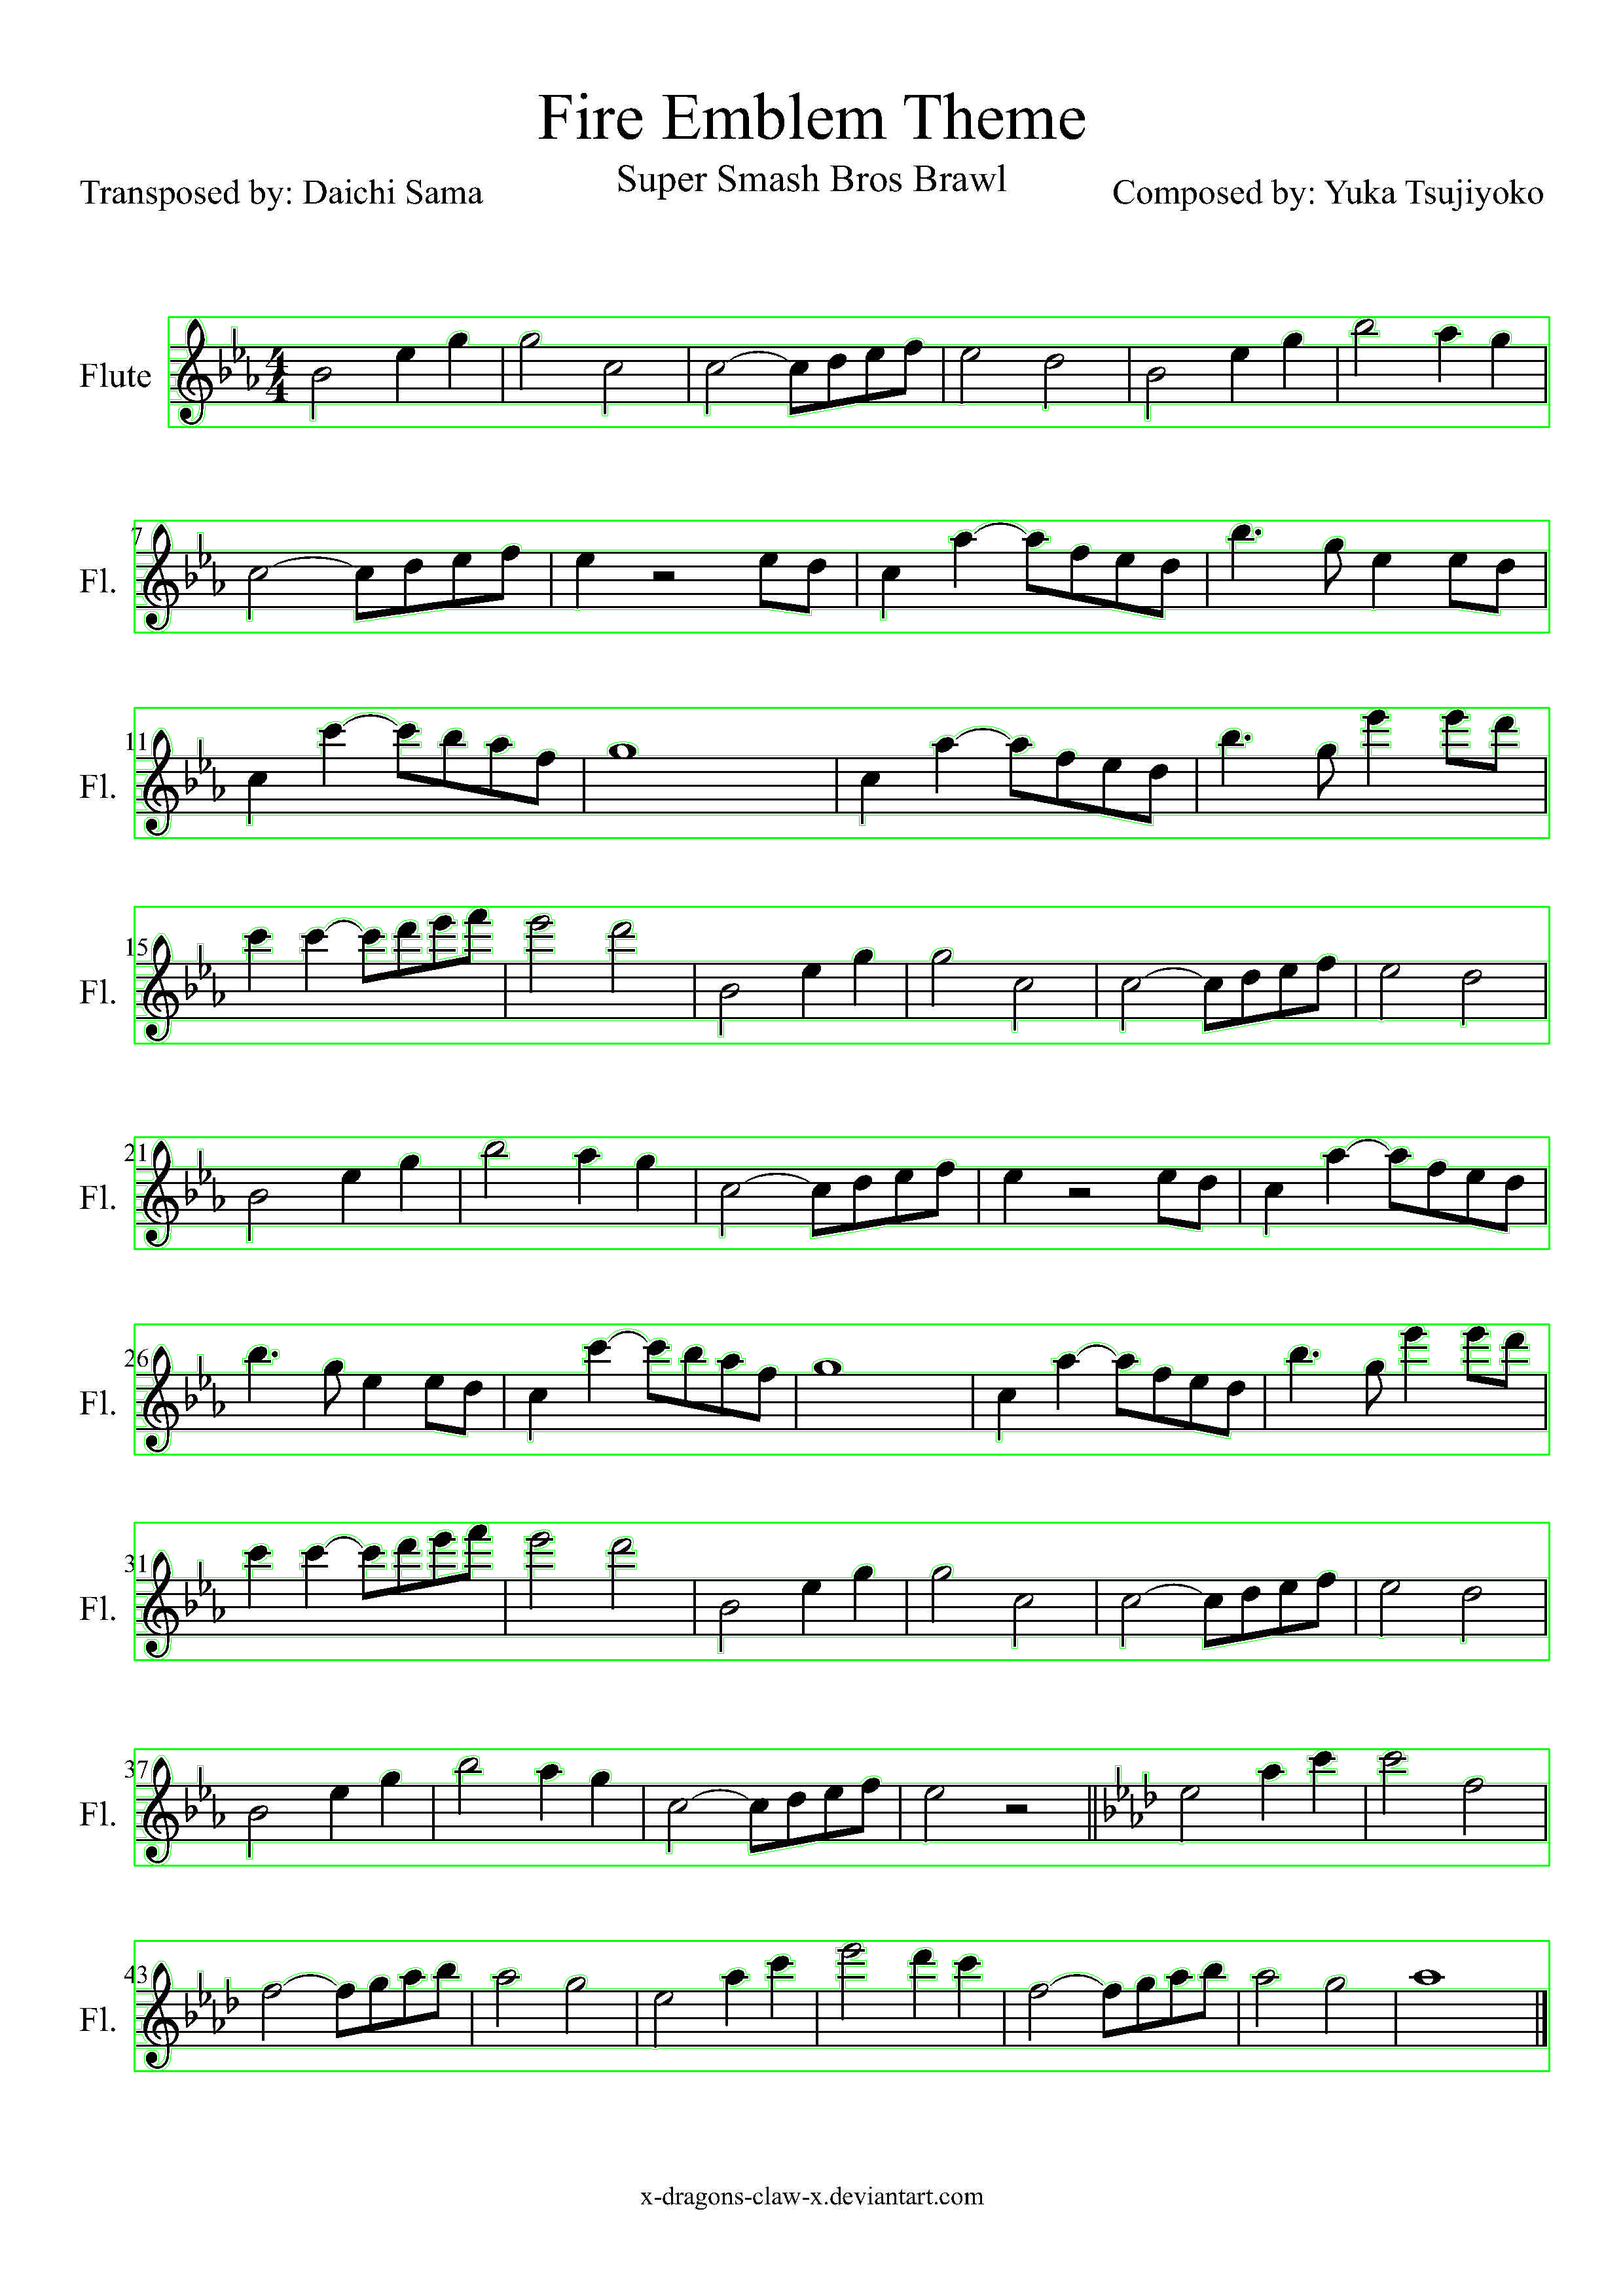

In [3]:
from PIL import Image
visualization = parser.draw_staff_lines(image, stafflines)
Image.fromarray(visualization)

### 2.YOLO-Parser

In [4]:
from ultralytics import YOLO
import cv2

model = YOLO('models/bach.pt')

staffs = [cv2.cvtColor(staffline.image, cv2.COLOR_RGB2BGR) for staffline in stafflines]

detections = []
for staff in staffs:
    results = model.predict(
        source=staff, 
        save = False,
        project='resources/output/YOLO/tests',
        verbose=False
    )
    detections.append(results)

[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


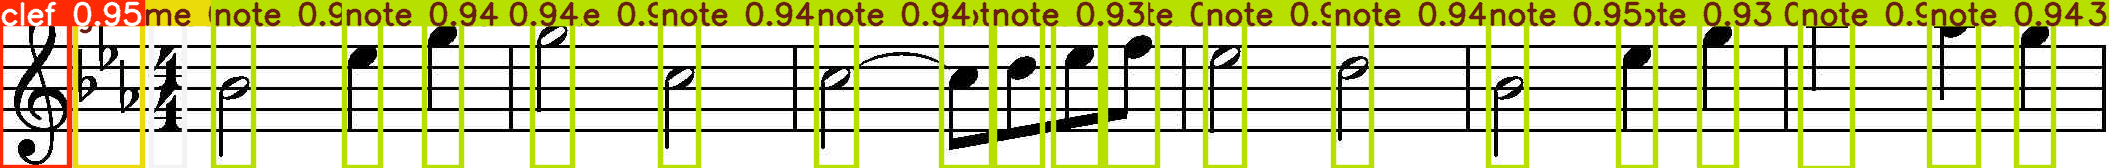

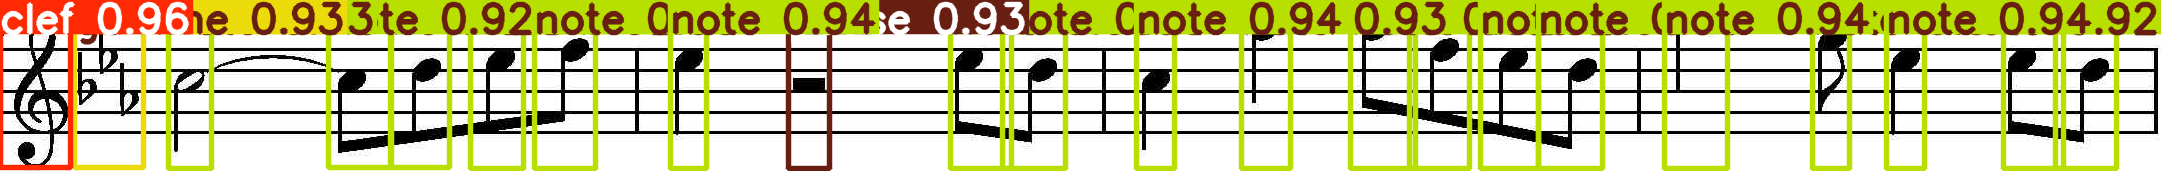

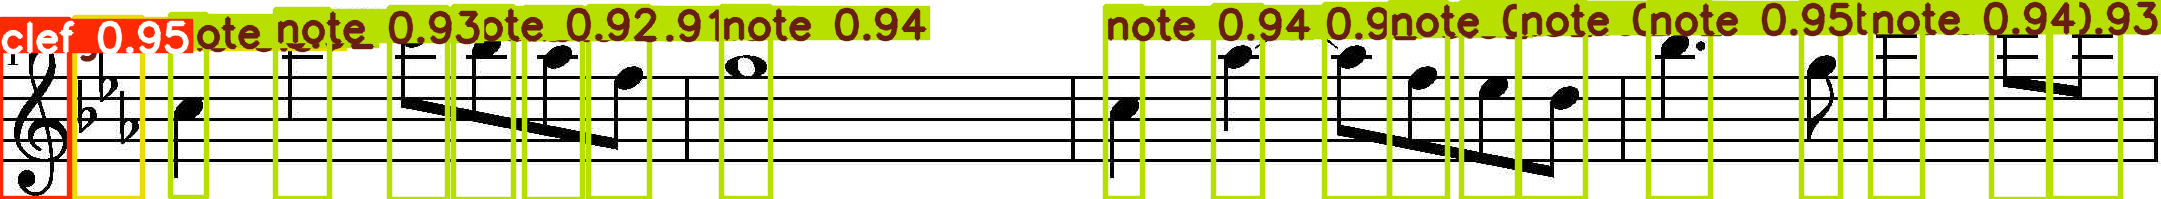

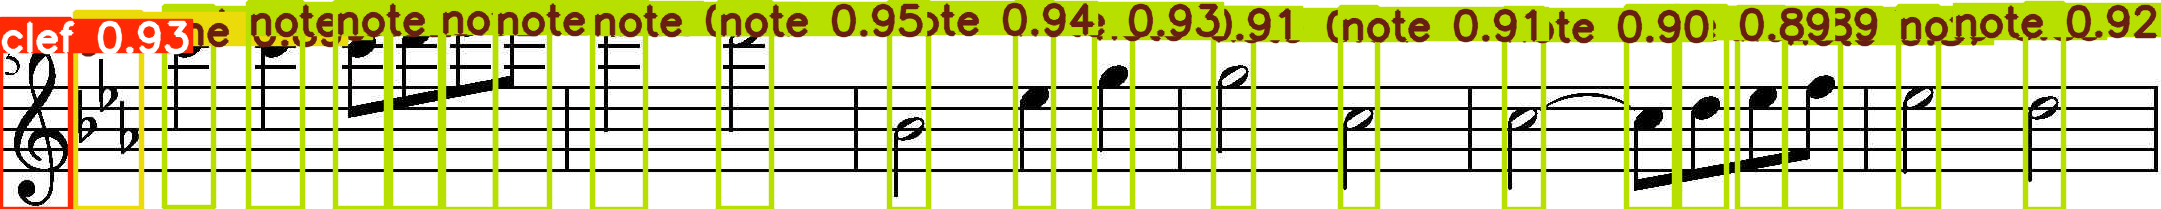

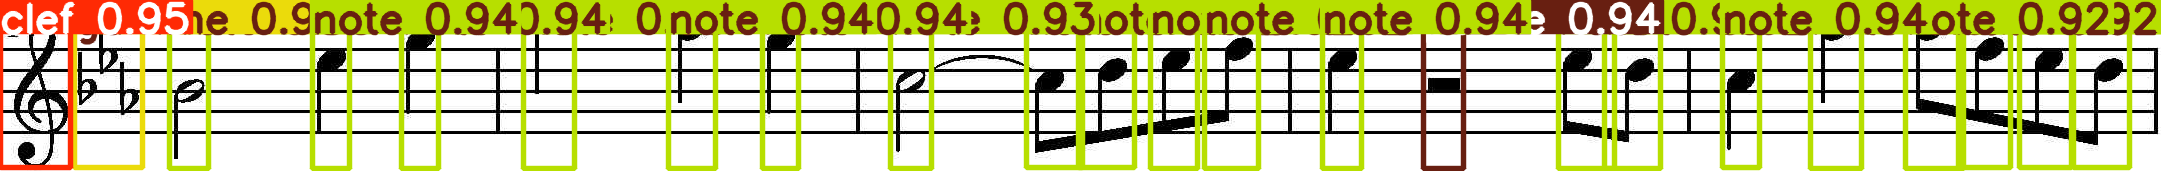

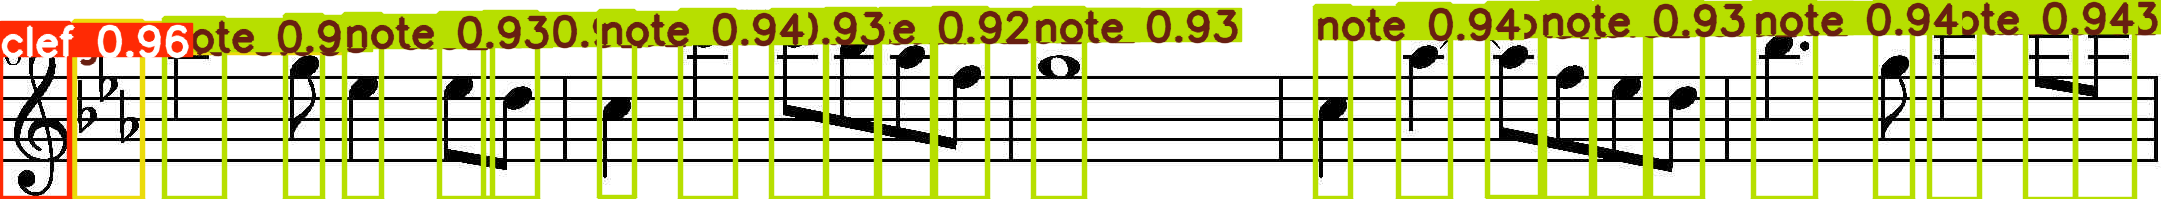

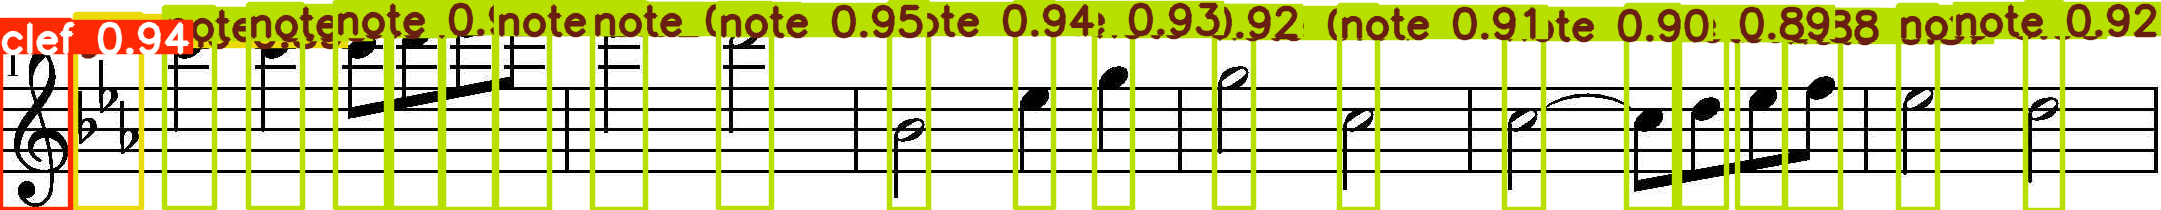

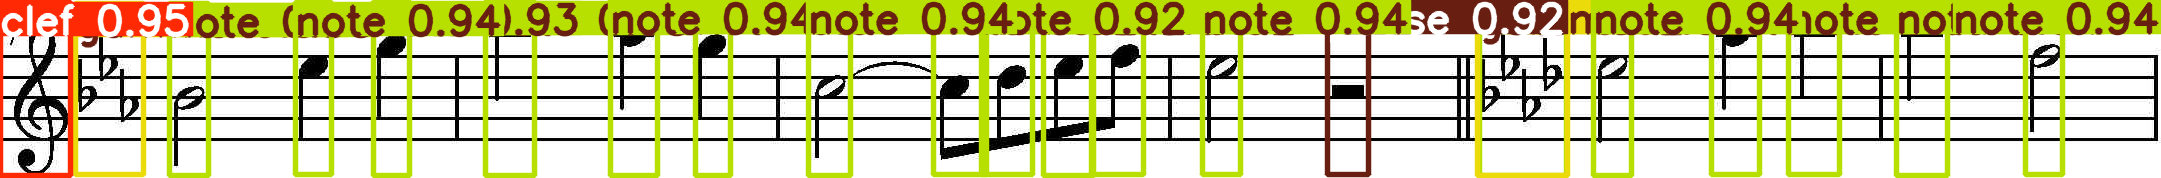

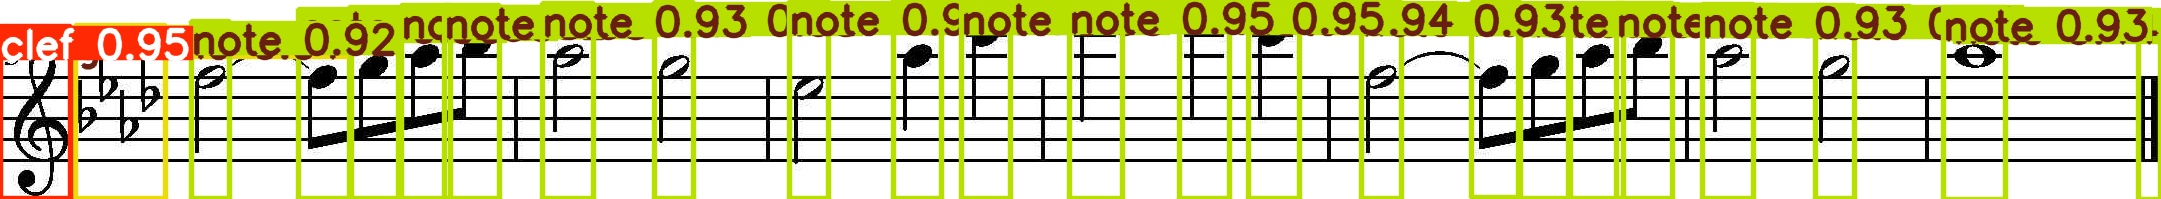

In [5]:
from PIL import Image

for i, result in enumerate(detections):
    display(Image.fromarray(result[0].plot()))



# 3. YOLO-Classification 

In [8]:
from ultralytics import YOLO
import cv2

model = YOLO('models/chopin.pt')

staffs = [cv2.cvtColor(staffline.image, cv2.COLOR_RGB2BGR) for staffline in stafflines]

detections = []
for staff in staffs:
    results = model.predict(
        source=staff, 
        conf=0.5,
        save = False,
        project='resources/output/YOLO/tests',
        verbose=False
    )
    detections.append(results)

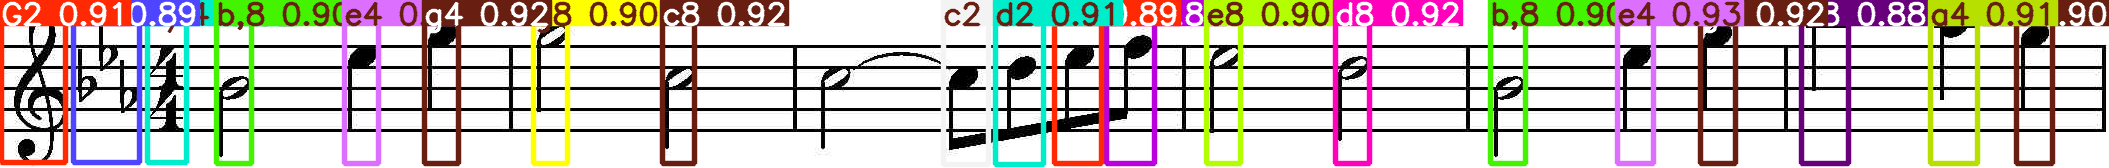

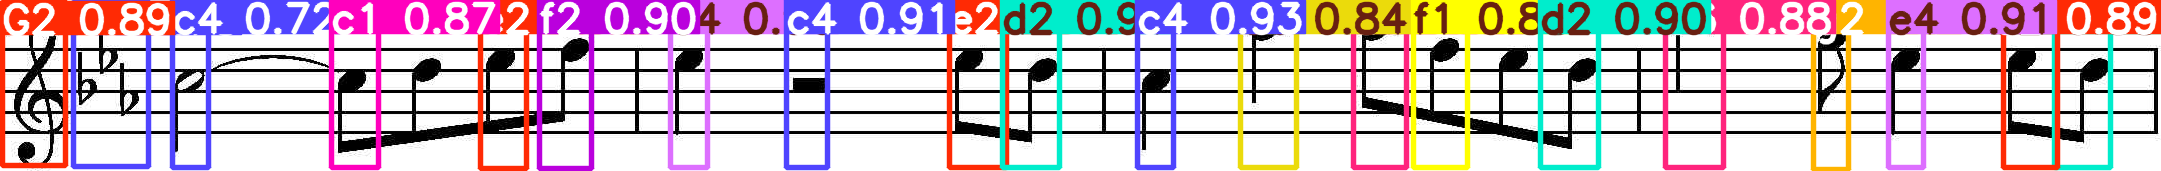

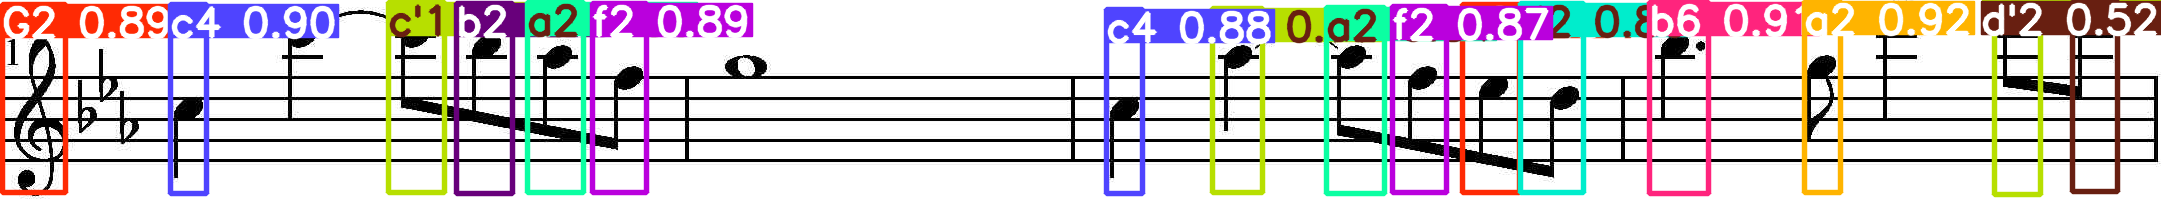

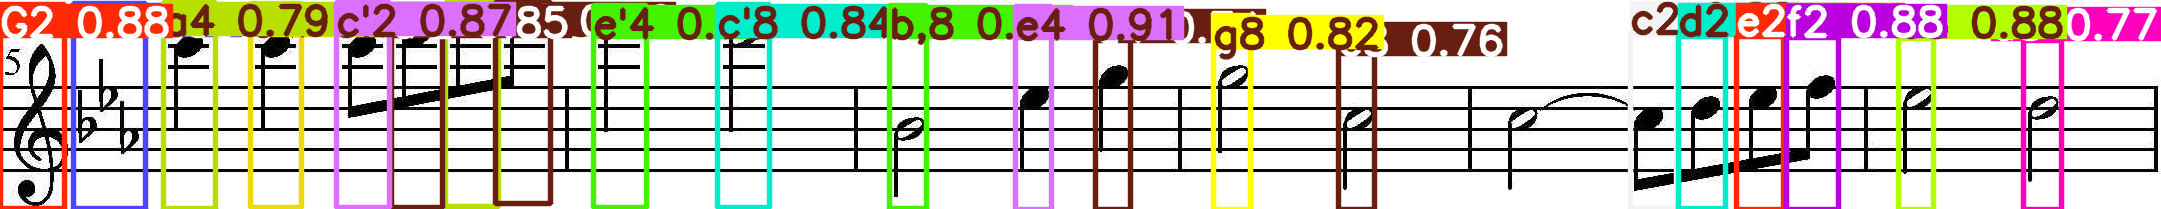

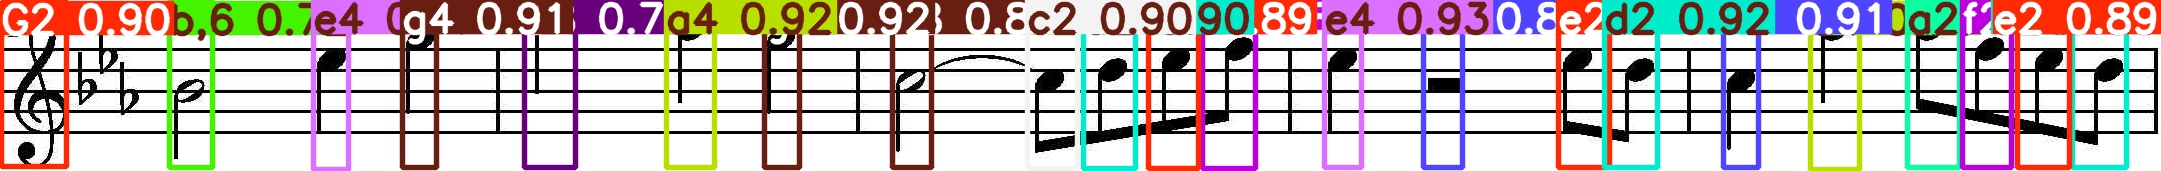

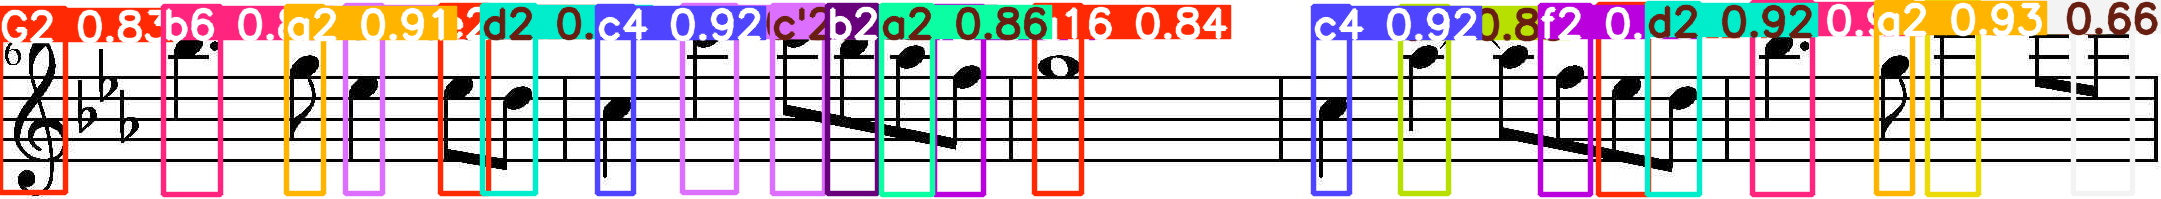

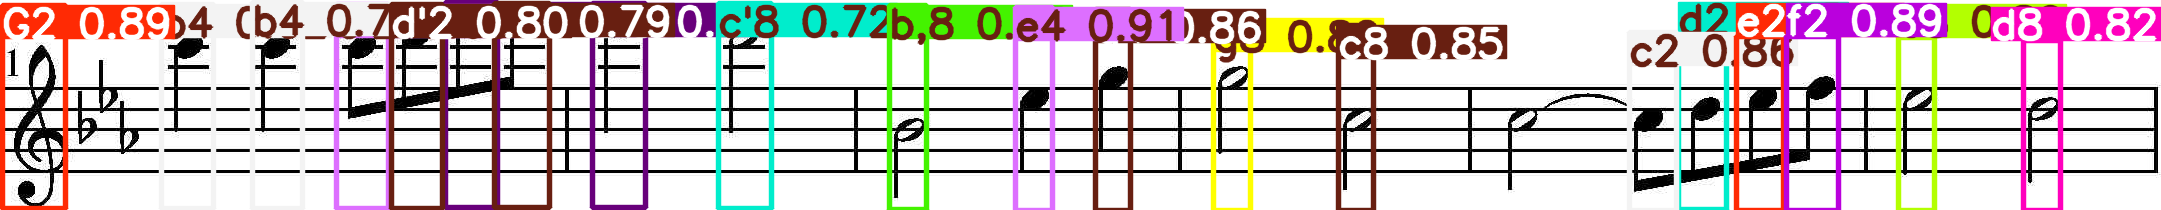

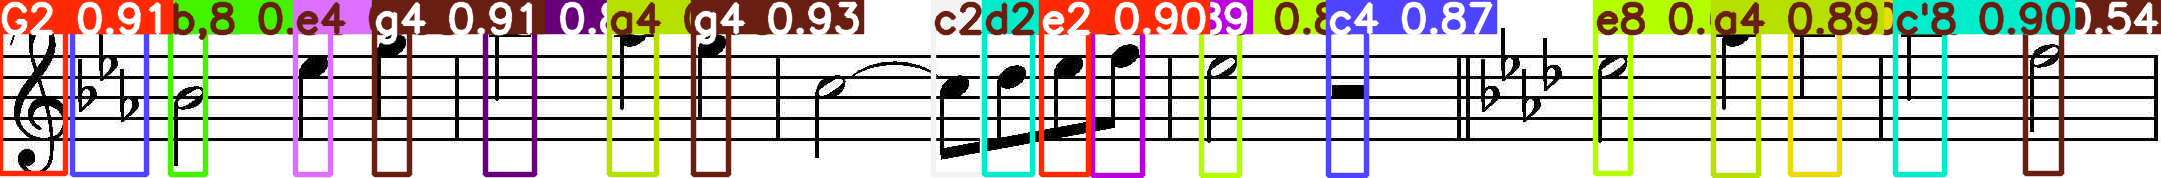

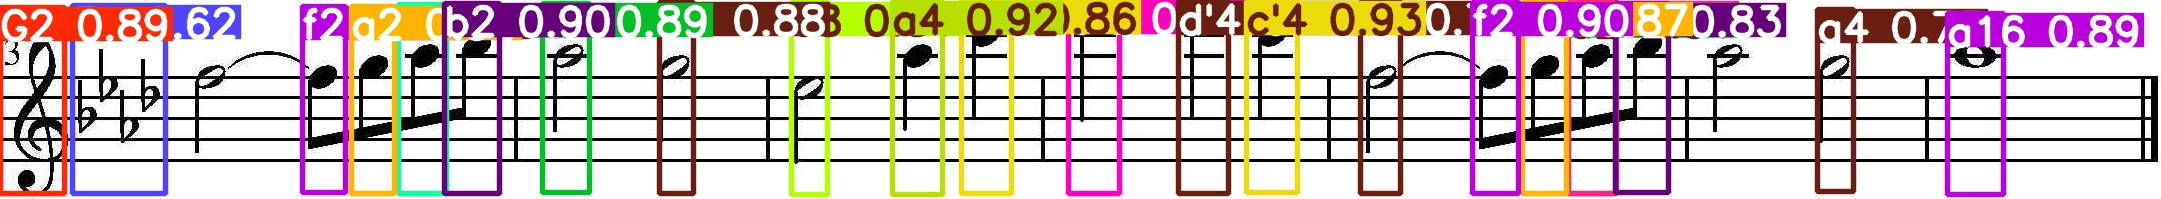

In [9]:
from PIL import Image

for i, result in enumerate(detections):
    display(Image.fromarray(result[0].plot()))